# 主旨

在Black-Scholes Model成立下，分析歐式選擇權對以下五個變數之敏感度
- Delta : 「選擇權」對「股票價格」之敏感度
- Gamma : 「Delta」對「股票價格」之敏感度
- Vega : 「選擇權」對「波動度」之敏感度
- Theta : 「選擇權」對「到期期間」之敏感度
- Rho : 「選擇權」對「利率」之敏感度

# 導入套件

In [1]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 1.Delta敏感度分析

## 1-1 設定參數

In [2]:
K = 100  # 履約價 ( 假設買賣權履約價相同 )
T = 1.0  # 到期期間 (單位:年)
r = 0.05  # 無風險利率
sigma = 0.2 

## 1-2 計算不同股價下的Delta

In [3]:
S_list = []  # 股價list
for i in range(1,200) :  # 給定股價範圍:1~200
    S_list.append(i)

In [4]:
Delta_call = []  # 盛裝各種股價下的買權Delta
Delta_put = []   # 盛裝各種股價下的賣權Delta

# 計算各種股價下的買賣權Delta

for i in S_list :  
    d1 = ( np.log(i/K) + ( r + sigma**2/2 )*T ) / sigma*np.sqrt(T)
    N_d1 = norm.cdf(d1)
    Delta_call.append(N_d1)
    Delta_put.append(N_d1-1)

## 1-3 展示圖形

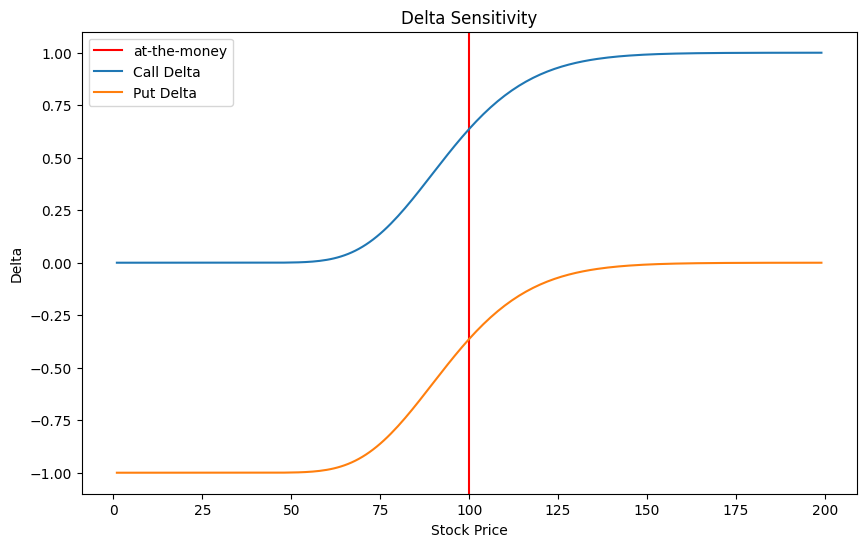

In [5]:
plt.figure( figsize=(10,6) )  # 設定圖形長寬
plt.title( 'Delta Sensitivity' )  # 標題
plt.xlabel( 'Stock Price' )  # X軸名稱
plt.ylabel( 'Delta' )  # Y軸名稱
plt.axvline( x=K, color = 'r', label = 'at-the-money' )  # 在價平處畫一條垂直紅線
plt.plot( S_list, Delta_call, label = 'Call Delta' )  # x=股價, y=買權delta
plt.plot( S_list, Delta_put, label = 'Put Delta' )  # x=股價, y=賣權delta
plt.legend(loc=0)  # 在圖中增加圖例

# 2.Gamma敏感度分析

## 2-1 設定參數

In [6]:
K = 100  # 履約價 ( 假設買賣權履約價相同 )
T = 1.0  # 到期期間 (單位:年)
r = 0.05  # 無風險利率
sigma = 0.2 

## 2-2 計算不同股價下的Gamma

In [7]:
S_list = []  # 股價list
for i in range(1,200) :  # 給定股價範圍:1~200
    S_list.append(i)

In [8]:
Gamma_list = []  #  盛裝不同股價下的Gamma

# 計算不同股價下的Gamma

for i in S_list :  
    d1 = ( np.log(i/K) + ( r + sigma**2/2 )*T ) / sigma*np.sqrt(T)
    Npdf_d1 = norm.pdf(d1)  # 標準常態分配之pdf
    Gamma = Npdf_d1 / ( i * sigma * math.sqrt(T) )  # 買權和賣權之Gamma相同
    Gamma_list.append(Gamma)

## 2-3 展示圖形

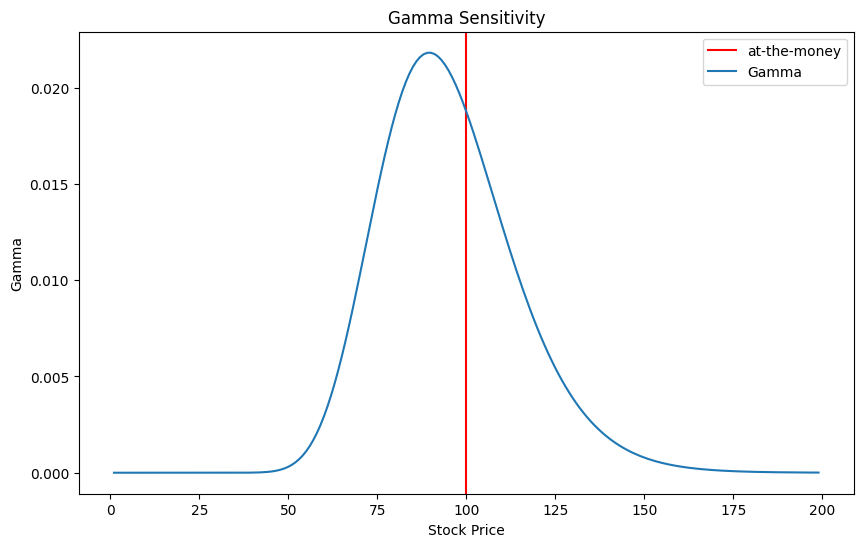

In [9]:
plt.figure( figsize=(10,6) )  # 設定圖形長寬
plt.title( 'Gamma Sensitivity' )  # 標題
plt.xlabel( 'Stock Price' )  # X軸標籤
plt.ylabel( 'Gamma' )  # Y軸標籤
plt.axvline( x=K, color = 'r', label = 'at-the-money' )  # 在價平處畫一條垂直紅線
plt.plot( S_list,Gamma_list , label = 'Gamma' )  # x=股價, y=買權delta
plt.legend(loc=0)  # 在圖中增加圖例
plt.show()

# 3.Vega敏感度分析

## 3-1 設定參數

In [10]:
S0 = 100  # 目前股價
K = 100  # 履約價 ( 假設買賣權履約價相同 )
T = 1.0  # 到期期間 (單位:年)
r = 0.05  # 無風險利率

## 3-2 計算不同波動度下之Vega

In [11]:
sigma_list = np.arange(0.01, 8.01, 0.01)  # data type : np.array

In [12]:
vega_list = []  

# 計算不同波動度下的vega

for i in sigma_list :
    d1 = ( np.log(S0/K) + ( r + i**2/2 )*T ) / i*np.sqrt(T)
    Npdf_d1 = norm.pdf(d1)  # 標準常態分配之pdf
    vega = S0 * np.sqrt( T ) * Npdf_d1  # 買、賣權之vaga相同
    vega_list.append( vega )

## 3-3 展示圖形

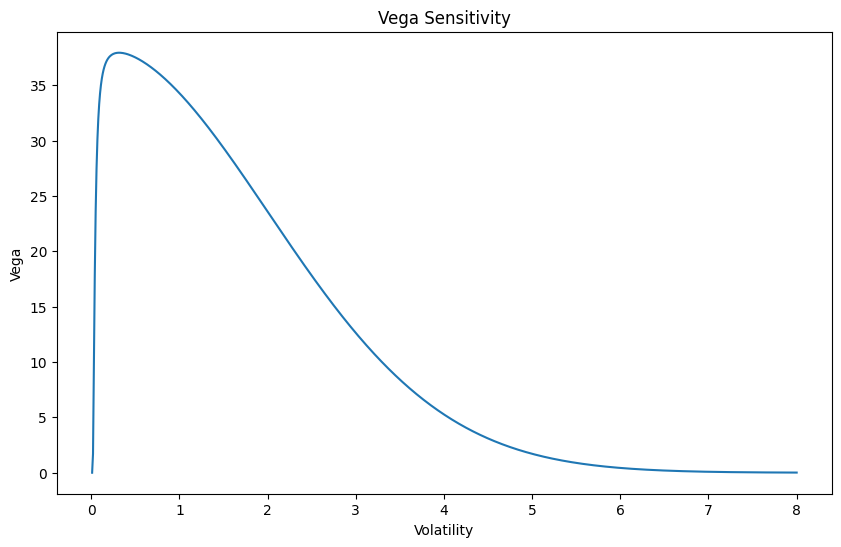

In [13]:
plt.figure( figsize=(10,6) )  # 設定圖形長寬
plt.title( 'Vega Sensitivity' )  # 標題
plt.xlabel( 'Volatility' )  # X軸標籤
plt.ylabel( 'Vega' )  # Y軸標籤
plt.plot( sigma_list, vega_list )  # x=sigma, y=vega
plt.show()

# 4.Theta敏感度分析

## 4-1 設定參數

In [14]:
S0 = 100  # 目前股價
K = 100  # 履約價 ( 假設買賣權履約價相同 )
r = 0.05  # 無風險利率
sigma = 0.2  # 波動度

## 4-2 計算不同到期期間下之Theta

In [15]:
T_list = np.arange(0.01, 2.01, 0.01)

In [16]:
Theta_call_list = []
Theta_put_list = []

# 計算不同到期期間下的Theta

for i in T_list :
    d1 = ( np.log(S0/K) + ( r + sigma**2/2 )*i ) / sigma*np.sqrt(i)
    d2 = d1 - sigma*np.sqrt(i)
    Npdf_d1 = norm.pdf(d1)  # 標準常態分配之pdf
    N_d2 = norm.cdf(d2)  # 標準常態分配之cdf
    Theta_call = ( ( S0*Npdf_d1*sigma ) / 2*np.sqrt(i) ) + r*K*np.exp(-r*i)*N_d2
    Theta_put = ( ( S0*Npdf_d1*sigma ) / 2*np.sqrt(i) ) + r*K*np.exp(-r*i)*( N_d2 - 1 )
    Theta_call_list.append( Theta_call )
    Theta_put_list.append( Theta_put )

## 4-3 展示圖形

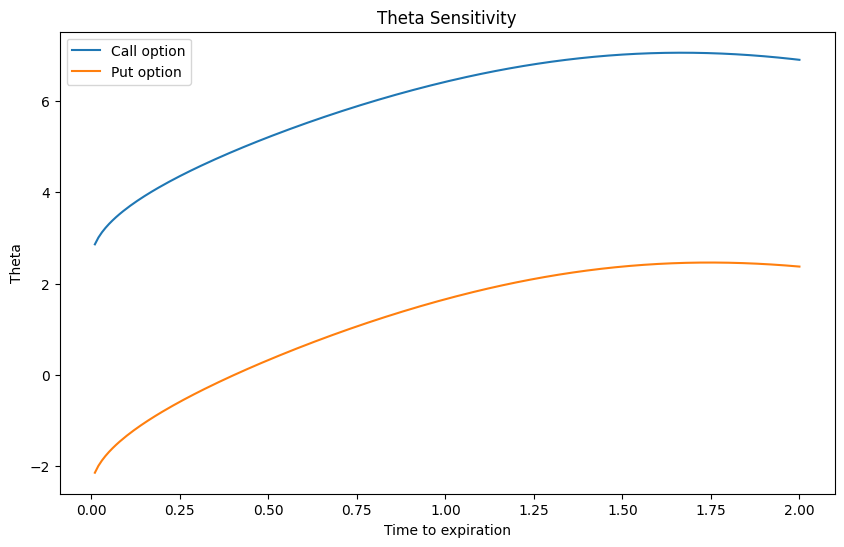

In [17]:
plt.figure( figsize=(10,6) )  # 設定圖形長寬
plt.title( 'Theta Sensitivity' )  # 標題
plt.xlabel( 'Time to expiration' )  # X軸標籤
plt.ylabel( 'Theta' )  # Y軸標籤
plt.plot( T_list, Theta_call_list, label = 'Call option' )  # x=T_list, y=買權Theta
plt.plot( T_list, Theta_put_list, label = 'Put option' )  # x=T_list, y=賣權Theta
plt.legend(loc=0)
plt.show()

# 5.Rho敏感度分析

## 5-1 設定參數

In [18]:
S0 = 100  # 目前股價
K = 100  # 履約價 ( 假設買賣權履約價相同 )
T = 1.0  # 到期期間 (單位:年)
sigma = 0.2  # 波動度

## 5-2 計算不同無風險利率下之Rho

In [19]:
r_list = np.arange(0.001, 0.201, 0.001)

In [20]:
Rho_call_list = []
Rho_put_list = []

for i in r_list :
    d1 = ( np.log(S0/K) + ( i + sigma**2/2 )*T ) / sigma*np.sqrt(T)
    d2 = d1 - sigma*np.sqrt(T)
    N_d2 = norm.cdf(d2)  # 標準常態分配之cdf
    Rho_call = T * K * np.exp( -i*T ) * N_d2
    Rho_put = T * K * np.exp( -i*T ) * ( N_d2 - 1 )
    Rho_call_list.append( Rho_call )
    Rho_put_list.append( Rho_put )

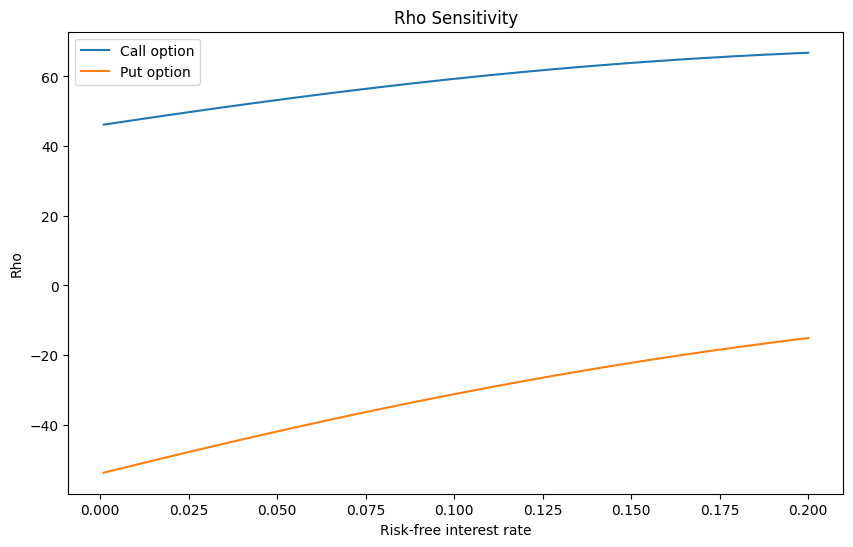

In [21]:
plt.figure( figsize=(10,6) )  # 設定圖形長寬
plt.title( 'Rho Sensitivity' )  # 標題
plt.xlabel( 'Risk-free interest rate' )  # X軸標籤
plt.ylabel( 'Rho' )  # Y軸標籤
plt.plot( r_list, Rho_call_list, label = 'Call option' )  # x=T_list, y=買權Theta
plt.plot( r_list, Rho_put_list, label = 'Put option' )  # x=T_list, y=賣權Theta
plt.legend(loc=0)
plt.show()